In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [35]:
from google.colab import files
uploaded=files.upload()

Saving wine.csv to wine (2).csv


In [36]:
df=pd.read_csv("wine.csv")

In [37]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [38]:
std=StandardScaler()
df1=std.fit_transform(df)

In [39]:
df1

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

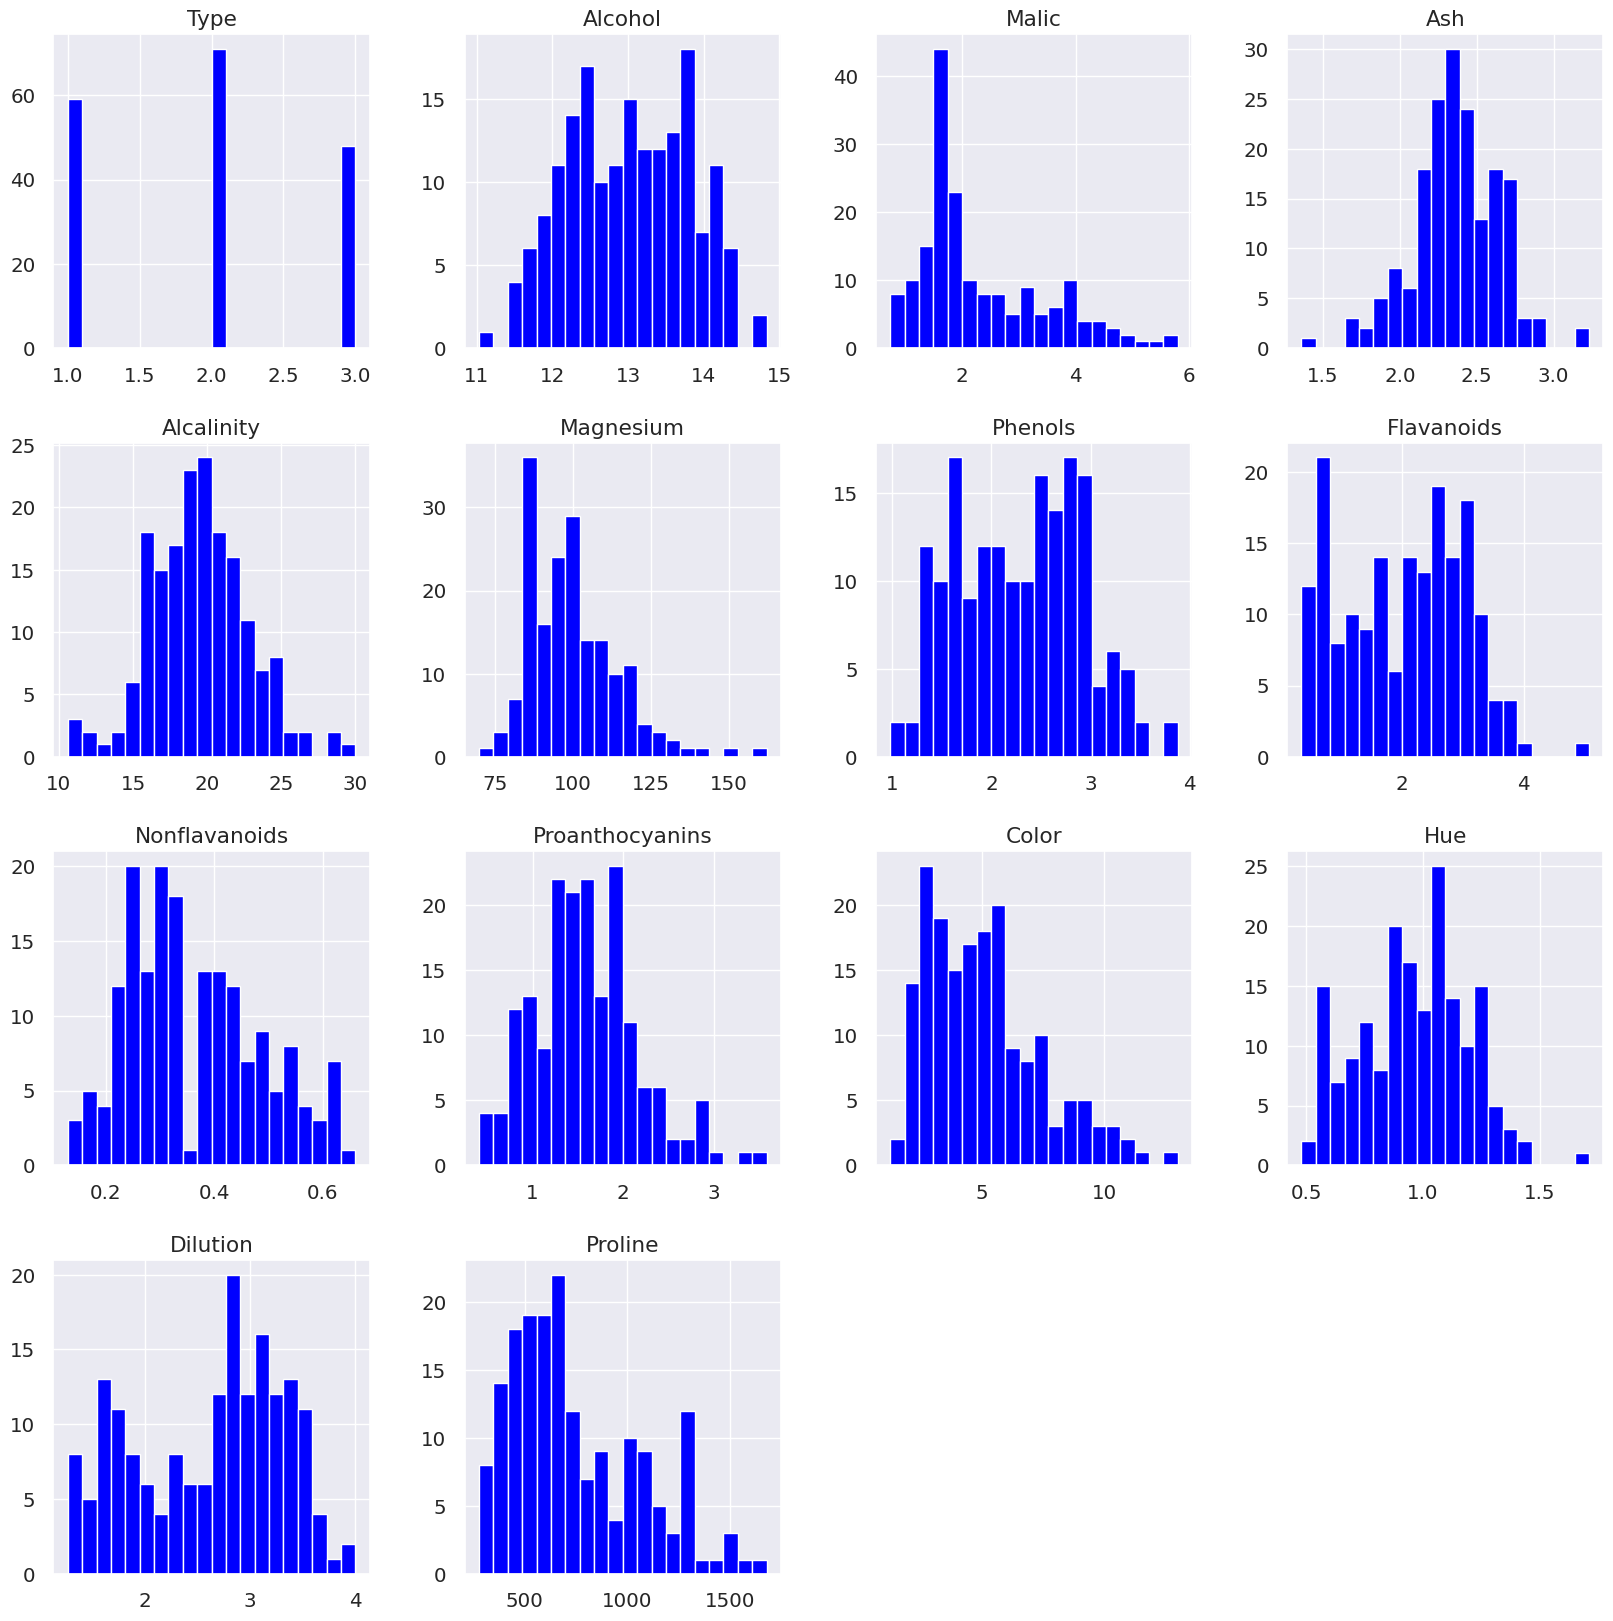

In [40]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20,color='blue' )

In [41]:
import warnings
warnings.filterwarnings('ignore')

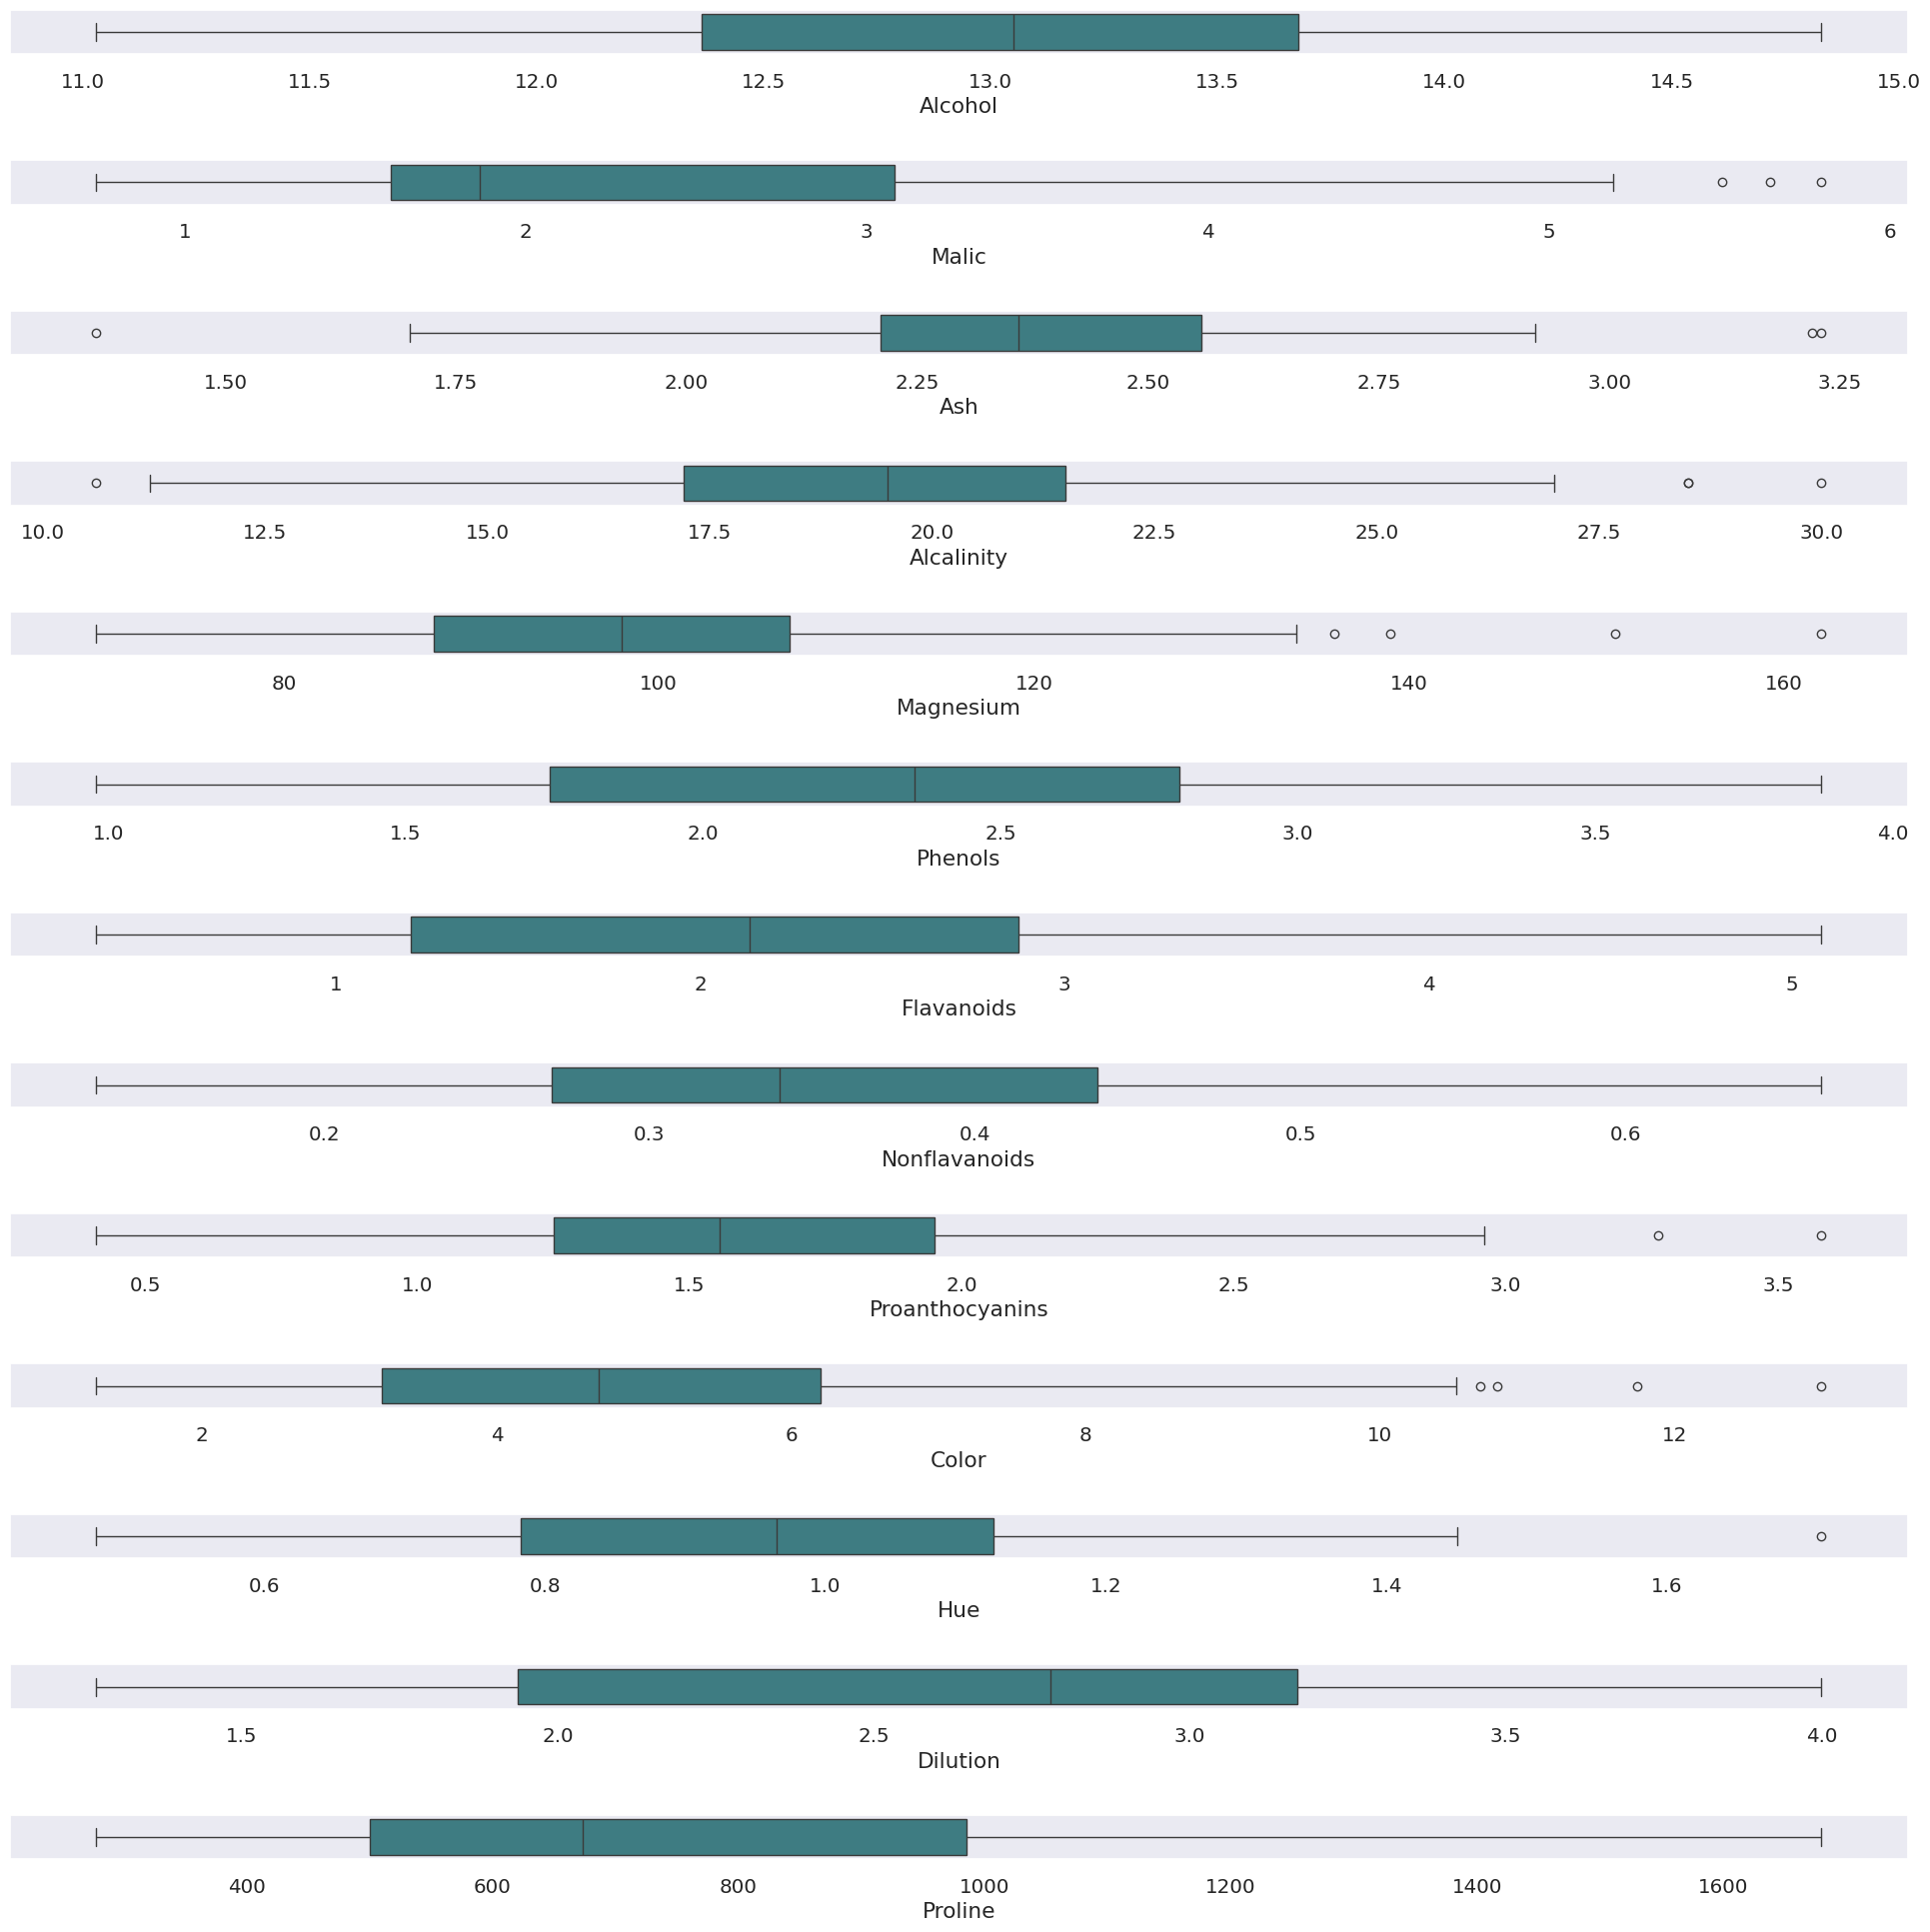

In [42]:
ot=df.copy()
fig, axes=plt.subplots(13,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=ot,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)

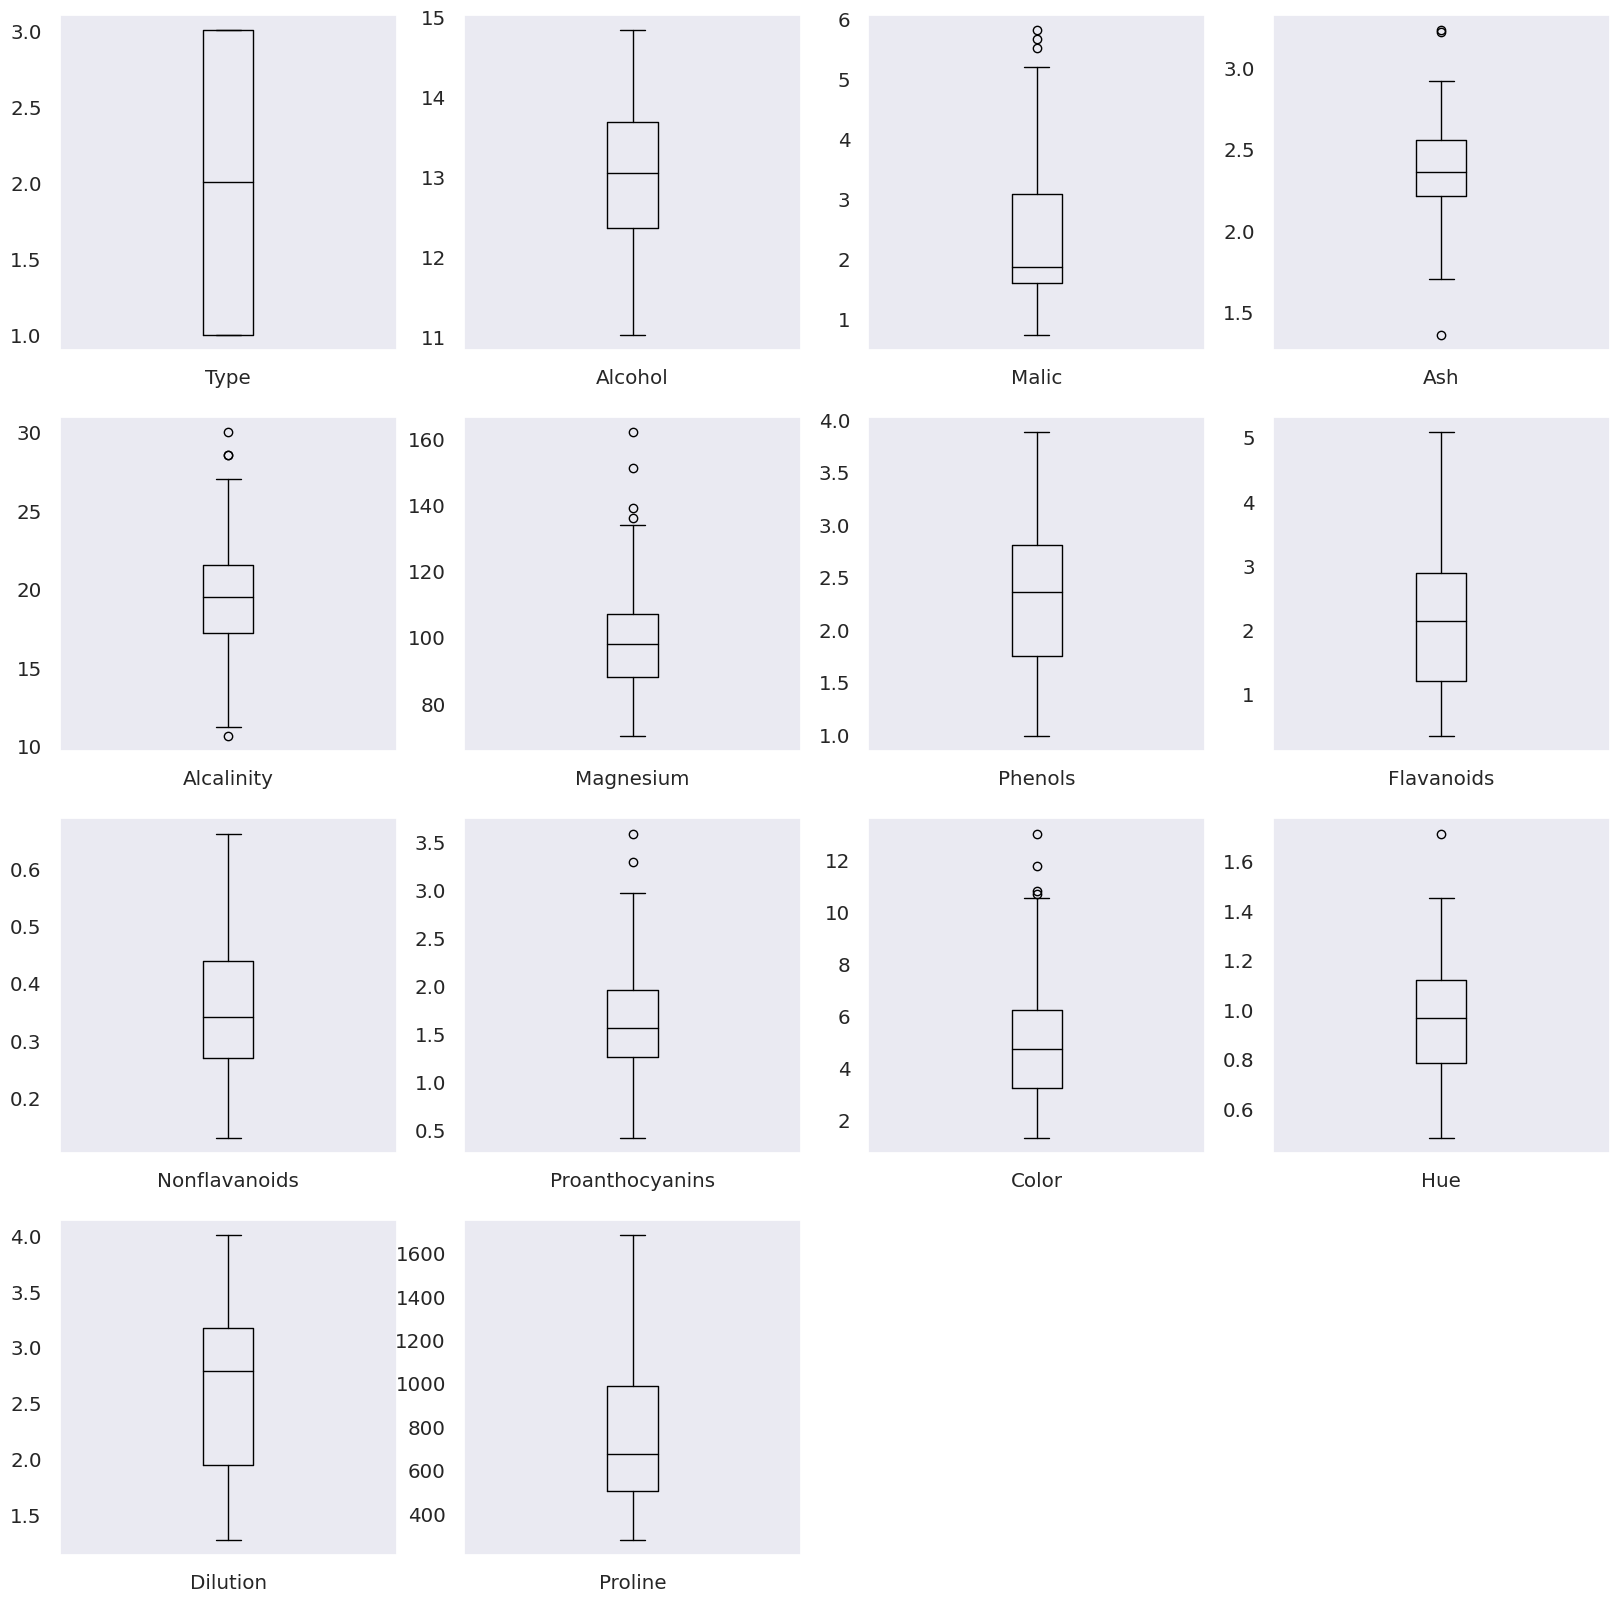

In [43]:
df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

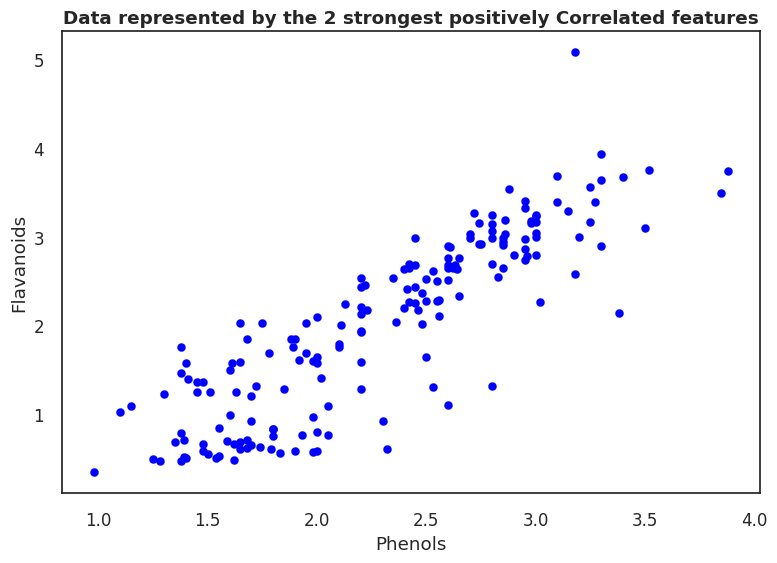

In [44]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=df['Phenols'], y=df['Flavanoids'], color='blue',lw=0.1)
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Data represented by the 2 strongest positively Correlated features',fontweight='bold')
plt.show()

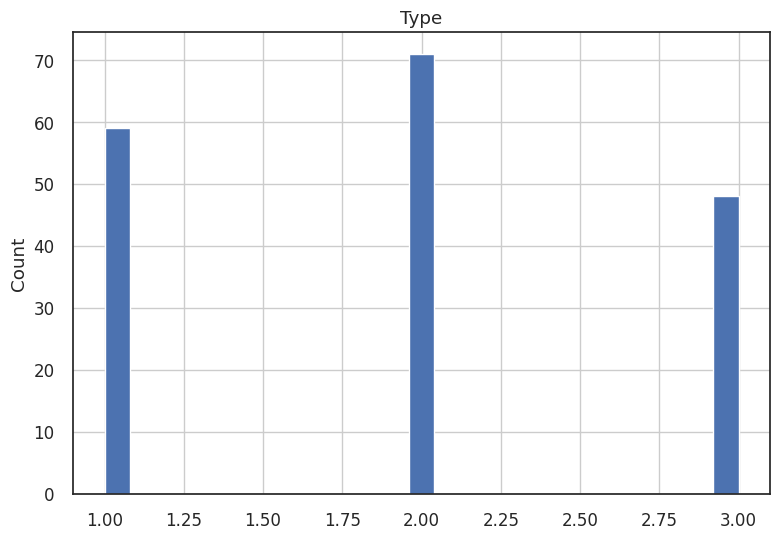

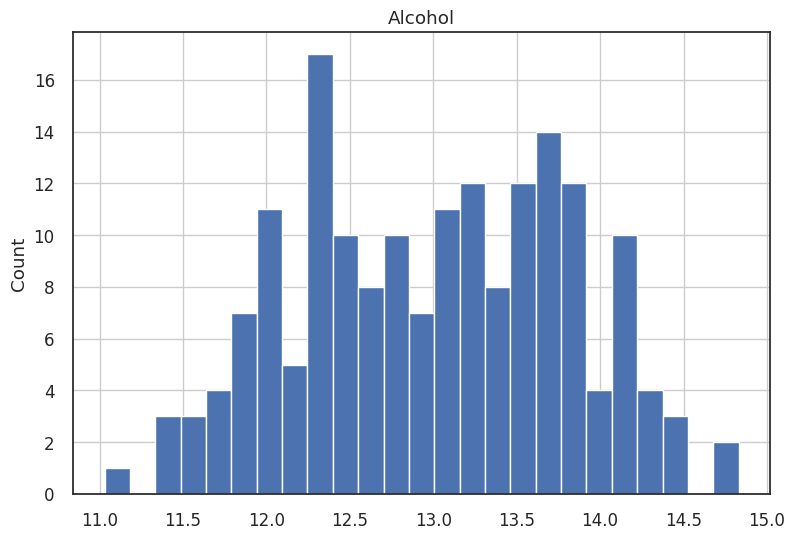

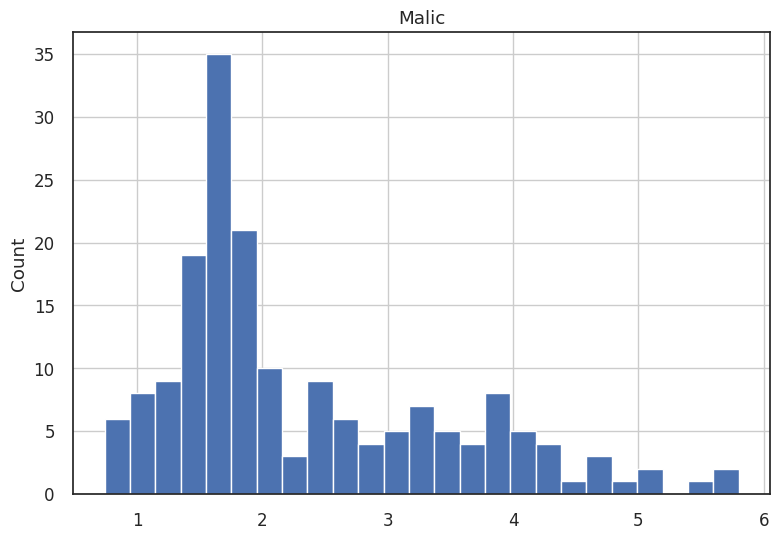

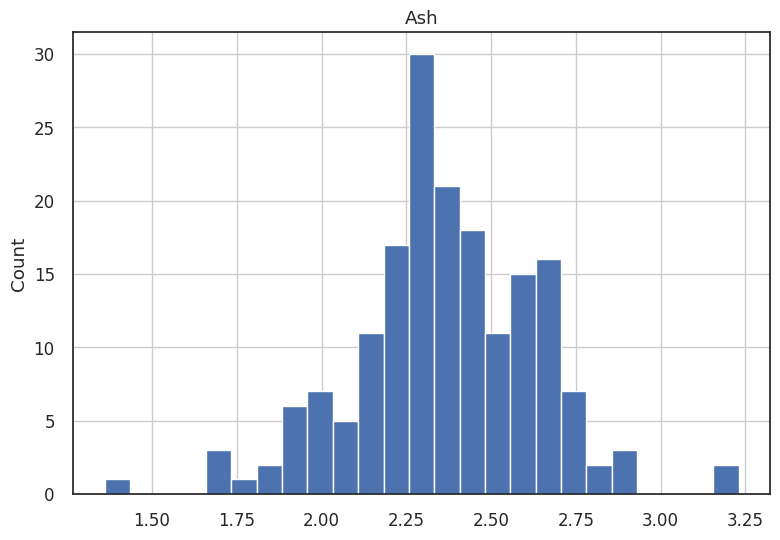

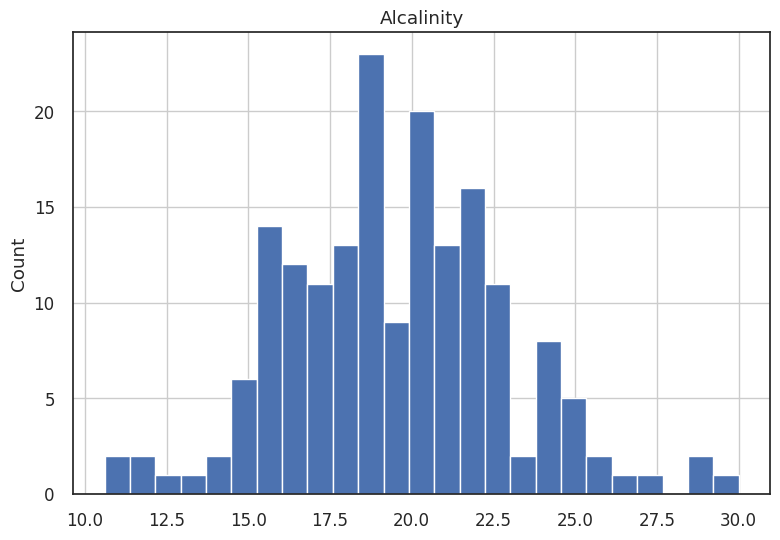

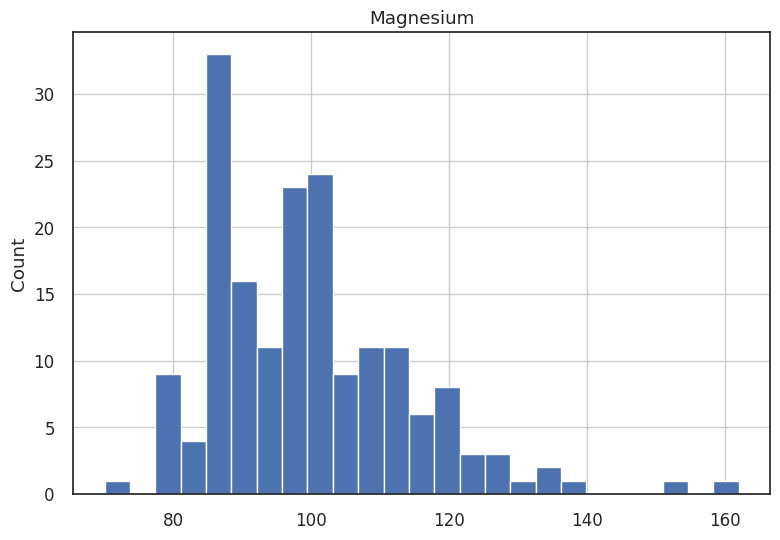

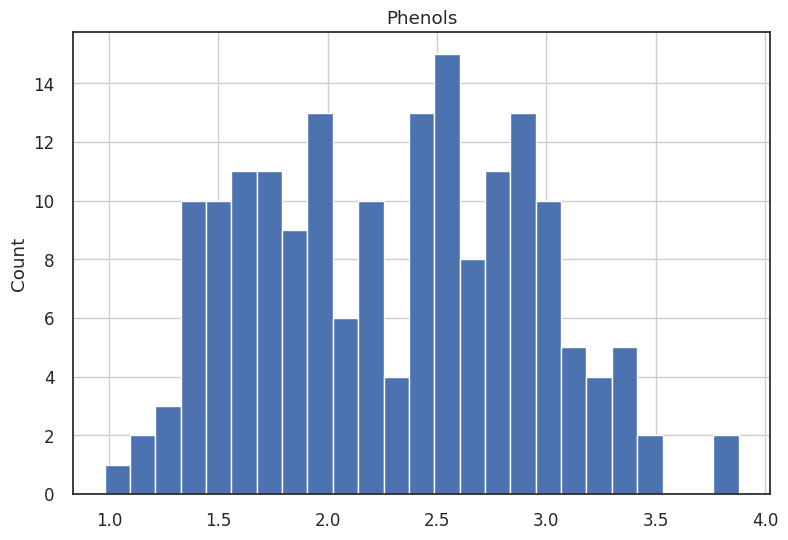

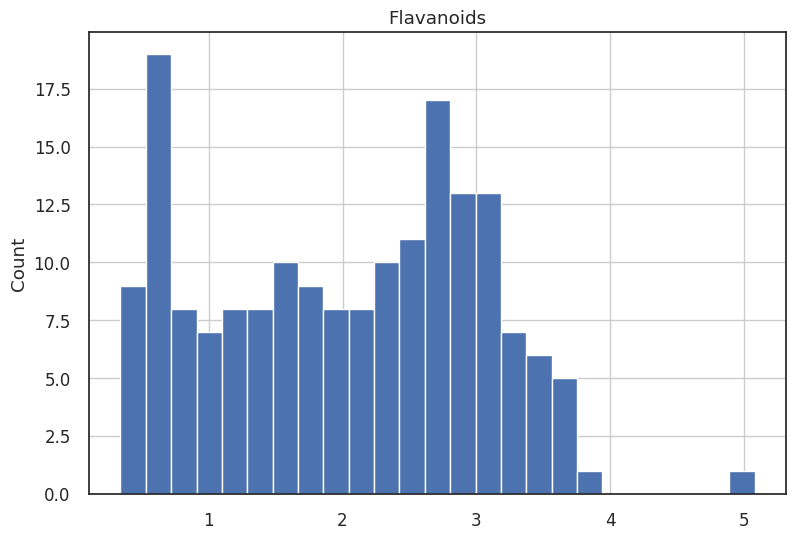

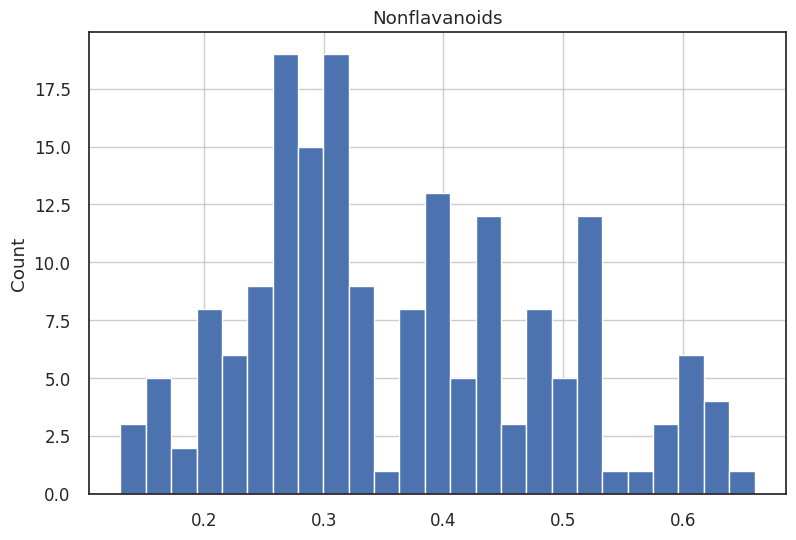

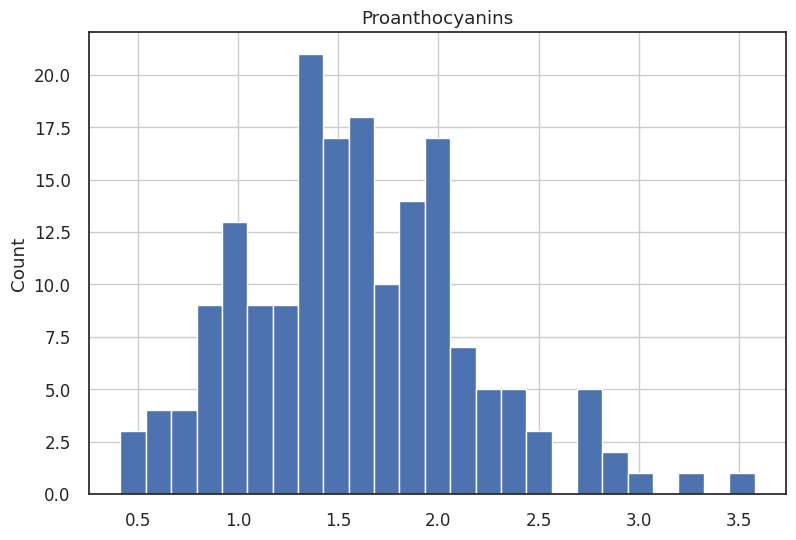

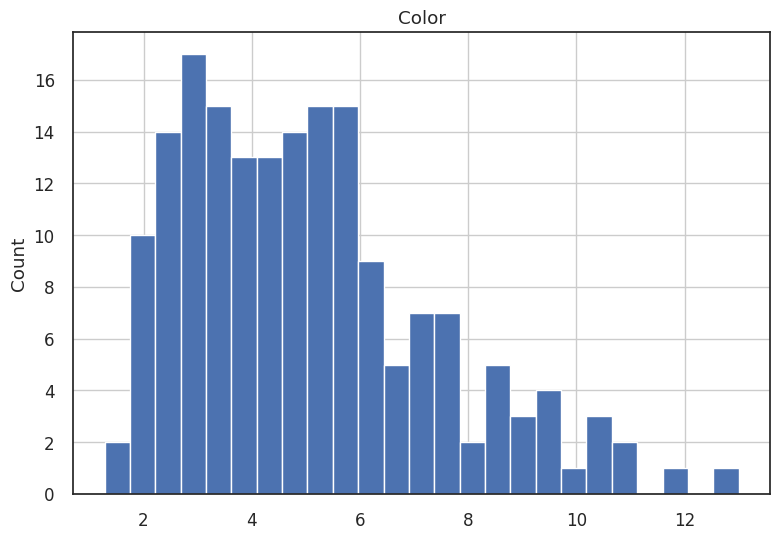

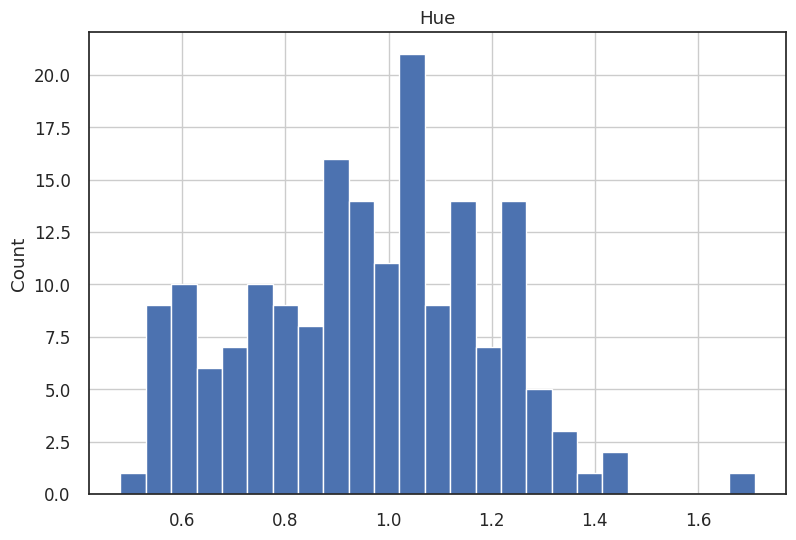

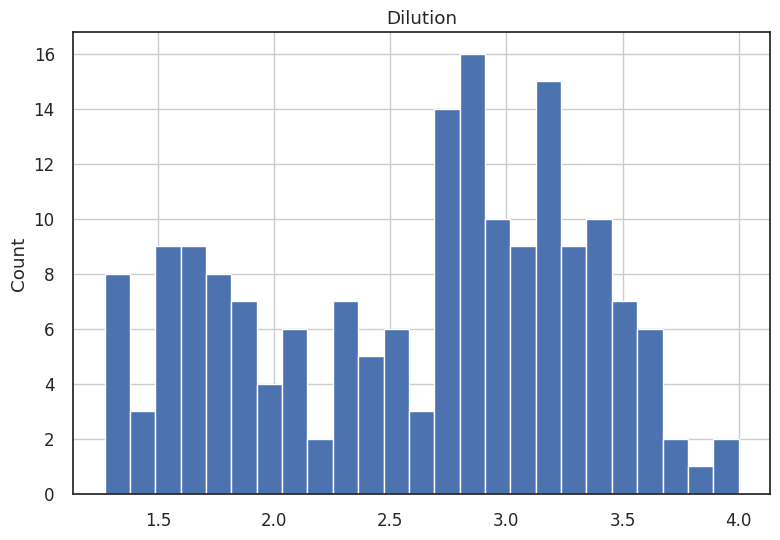

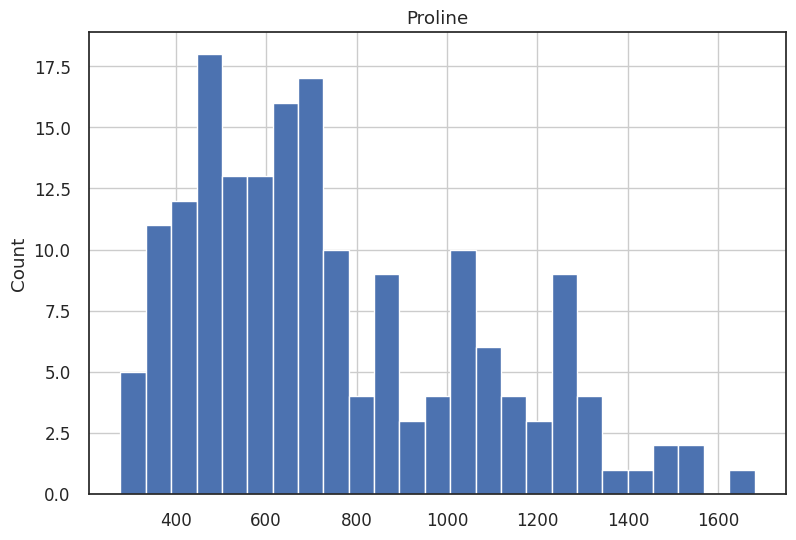

In [45]:
for feature in df.columns:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

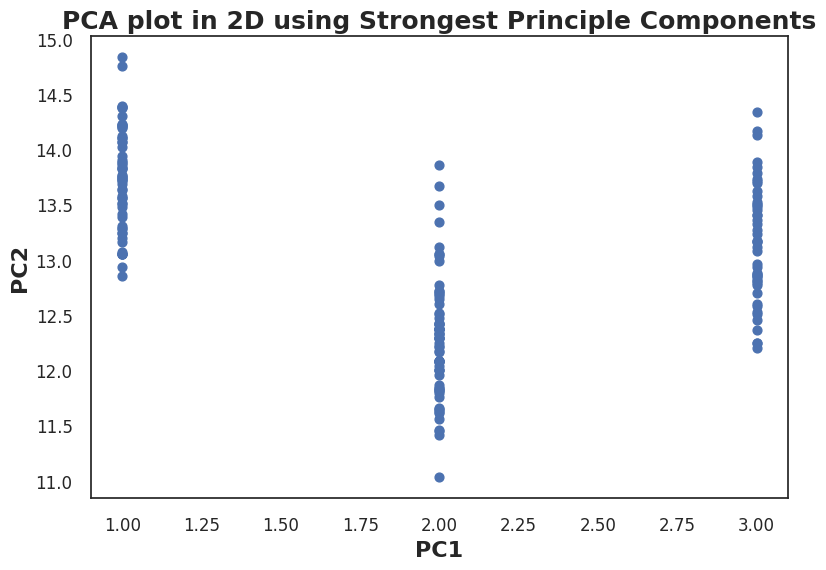

In [46]:
plt.figure(figsize=(9,6))

# Scatterplot
plt.scatter(df.iloc[:,0], df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components',fontweight='bold',fontsize=18)
plt.xlabel('PC1',fontweight='bold', fontsize=16)
plt.ylabel('PC2',fontweight='bold', fontsize=16)
plt.show()

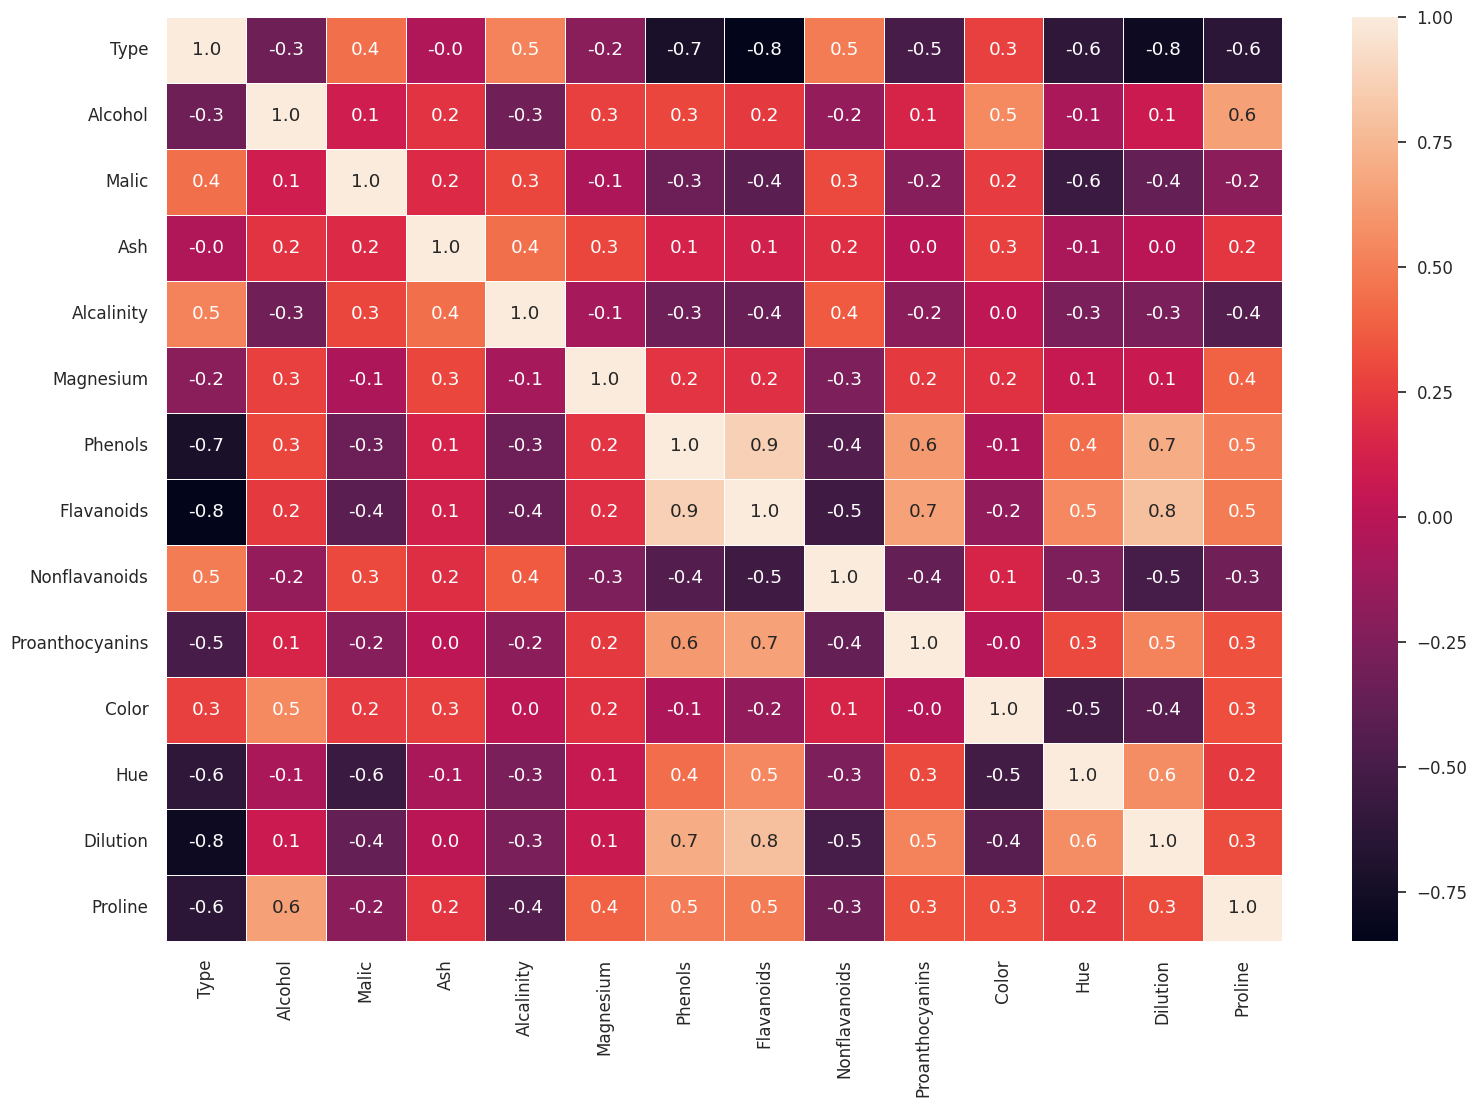

In [47]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

In [48]:
pca2=PCA(n_components=2)
pca_component=pd.DataFrame(pca2.fit_transform(df1),columns=['a','b'])
pca_component.head(7)

,a,b
0,-3.522934,-1.453098
1,-2.528858,0.330019
2,-2.785029,-1.036936
3,-3.922588,-2.768210
4,-1.407511,-0.867773
5,-3.288130,-2.130175
6,-2.750578,-1.179170


In [49]:
pca3=PCA(n_components=3)
pca3.fit(df1)

PCA(n_components=3)

In [54]:
pca=PCA(n_components=6)
pca_values=pca.fit_transform(df)

In [56]:
pca_values

array([[ 3.18564055e+02,  2.14907729e+01,  3.16461306e+00,
        -2.60165816e-01,  7.52091943e-01,  5.20108716e-01],
       [ 3.03098514e+02, -5.36608268e+00,  6.81699246e+00,
        -1.00497751e+00, -5.01045377e-01,  5.24392343e-02],
       [ 4.38062063e+02, -6.53798613e+00, -1.06671672e+00,
         9.77726666e-01,  4.53208097e-01,  6.34321618e-01],
       ...,
       [ 8.84563102e+01,  1.87796442e+01, -2.42312742e+00,
        -4.87427982e+00, -1.00271848e+00,  3.19367037e-01],
       [ 9.34544723e+01,  1.86741801e+01, -1.95877509e+00,
        -3.78996410e+00, -3.99557749e-01, -1.01108089e+00],
       [-1.86944619e+02, -2.11062888e-01, -5.73392038e+00,
        -3.36646246e+00,  1.86523066e-01,  7.69306963e-01]])

In [65]:
var = pca.explained_variance_ratio_
var

array([9.98087625e-01, 1.73591851e-03, 9.58948998e-05, 5.13200714e-05,
       1.29365230e-05, 8.73476385e-06])

In [62]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 99.81,  99.98,  99.99, 100.  , 100.  , 100.  ])

In [66]:
pca.components_

array([[-1.55934284e-03,  1.65926191e-03, -6.81019030e-04,
         1.94905197e-04, -4.67130461e-03,  1.78679787e-02,
         9.89831553e-04,  1.56729290e-03, -1.23086954e-04,
         6.00609082e-04,  2.32712720e-03,  1.71381131e-04,
         7.04935892e-04,  9.99821721e-01],
       [ 2.77861762e-03,  1.20426744e-03,  2.15953126e-03,
         4.59399561e-03,  2.64607000e-02,  9.99339902e-01,
         8.74730944e-04, -5.86582556e-05, -1.35399415e-03,
         5.00222716e-03,  1.51142222e-02, -7.64042527e-04,
        -3.50068415e-03, -1.77693551e-02],
       [-1.00919962e-01, -1.83035443e-02, -1.24559463e-01,
        -5.12928854e-02, -9.28099861e-01,  2.99845440e-02,
         4.27611042e-02,  9.02671155e-02, -1.37215147e-02,
         2.62371281e-02, -3.03202978e-01,  2.69922728e-02,
         7.43661999e-02, -4.62655971e-03],
       [-1.47645845e-01, -1.36988601e-01, -1.56739376e-01,
         1.20471220e-02,  3.56990103e-01,  4.75411673e-03,
         7.64520642e-02,  1.72191025e-01, -1.

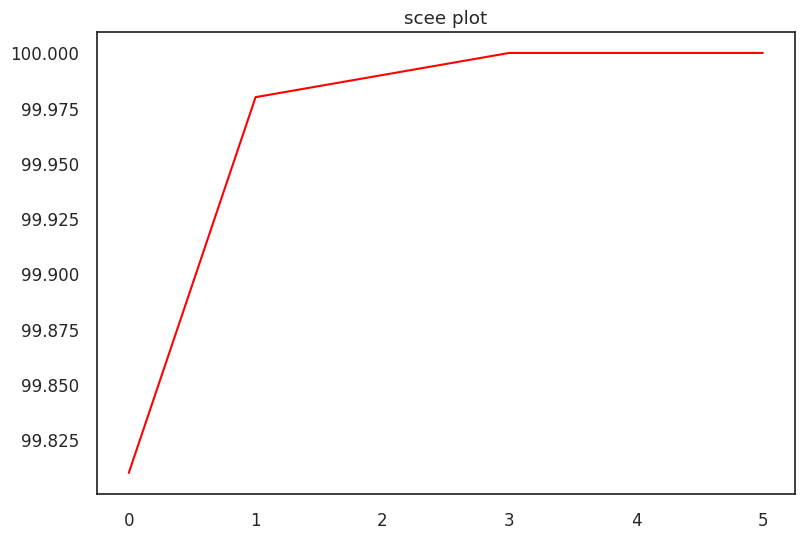

In [67]:
plt.plot(var1,color="red")
plt.title('scee plot')
plt.show()


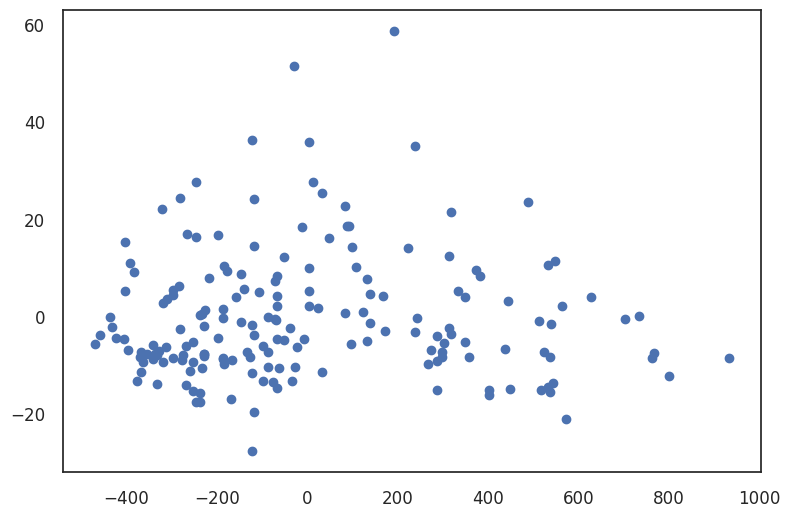

In [70]:
x=pca_values[:,0:1]
y=pca_values[:,1:2]
plt.scatter(x,y)